# Pandas

* Pandas is a powerful open-source Python library designed for efficient and intuitive data manipulation and analysis. It provides data structures and functions that make working with structured data simple and expressive. The name "Pandas" is derived from the term "Panel Data," which refers to multidimensional structured datasets.

* The most popular library for tabular data


    | Object type 	|                Meaning               	|              Used for             	|
    |:-----------:	|:------------------------------------:	|:---------------------------------:	|
    |  DataFrame  	| 2-dimensional data object with index 	| Tabular data organized in columns 	|
    |    Series   	| 1-dimensional data object with index 	|    Single (/time) series of data   	|




* Great connectivity to SQL databases or Spreadsheets


* Nice documentations: <a href='https://pandas.pydata.org/'>https://pandas.pydata.org/</a>



sources:


1. https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
2. Python for Finance Mastering Data-Driven Finance by Yves Hilpisch (ch. 5)
3. https://www.kaggle.com/learn/pandas
4. Also here: https://github.com/pytopia/Data-Processing-for-ML/tree/main/Lectures/04%20Pandas%20Fundamentals


We will cover:
* Pandas
* Creating pandas series and dataframes
* Importing/exporting files (reading data files)
* Indexing and selecting
* Basic analytics
* Group operations
* Parallel computation in Pandas
* Reshaping Data
* Merging
* Ploting dataframes
* Working with Pandas timesieries

In [57]:
import os
# documentation: https://docs.python.org/3/library/os.html

# Set target directory path to SESSION 1 folder
new_path = r"C:\Users\sharafi\Dropbox\ML course\Data Analytics Course\Data Science Course WS2025"  # use raw string or double backslashes on Windows

# Change the current working directory
os.chdir(new_path)

# Optional: Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\sharafi\Dropbox\ML course\Data Analytics Course\Data Science Course WS2025


In [56]:
import pandas as pd

#import numpy as many functionalities depends on np
import numpy as np

## Creation, input/output (I/O) operations




#### 1. Creation



In [58]:
observationsA = [10 , 18 , 23, 44]
MySeries = pd.DataFrame({'A': observationsA})       # Create a DataFrame with one column named 'A', and fill it with the values from observationsA
MySeries

,A
0,10
1,18
2,23
3,44


the index could be changed to other numbers, or strings, or dates (for time series analyses)

In [4]:
MySeries.index = range(10,14)
MySeries

,A
10,10
11,18
12,23
13,44


A data frame consists of several series that share one index:

In [5]:
observationsA = [10 , 18 , 23, 44]
observationsB = [11, 13 , 18, 30]

MyDataFrame= pd.DataFrame({'A': observationsA, 'B':observationsB})

MyDataFrame

,A,B
0,10,11
1,18,13
2,23,18
3,44,30


In [6]:
# modify the indexing and column names

MyDataFrame.index= ['a','b','c','d']
MyDataFrame.columns= ['Aa','Bb']

MyDataFrame

,Aa,Bb
a,10,11
b,18,13
c,23,18
d,44,30


#### 2. Import/export files

* one can import/export many data sets with several formats

link: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html


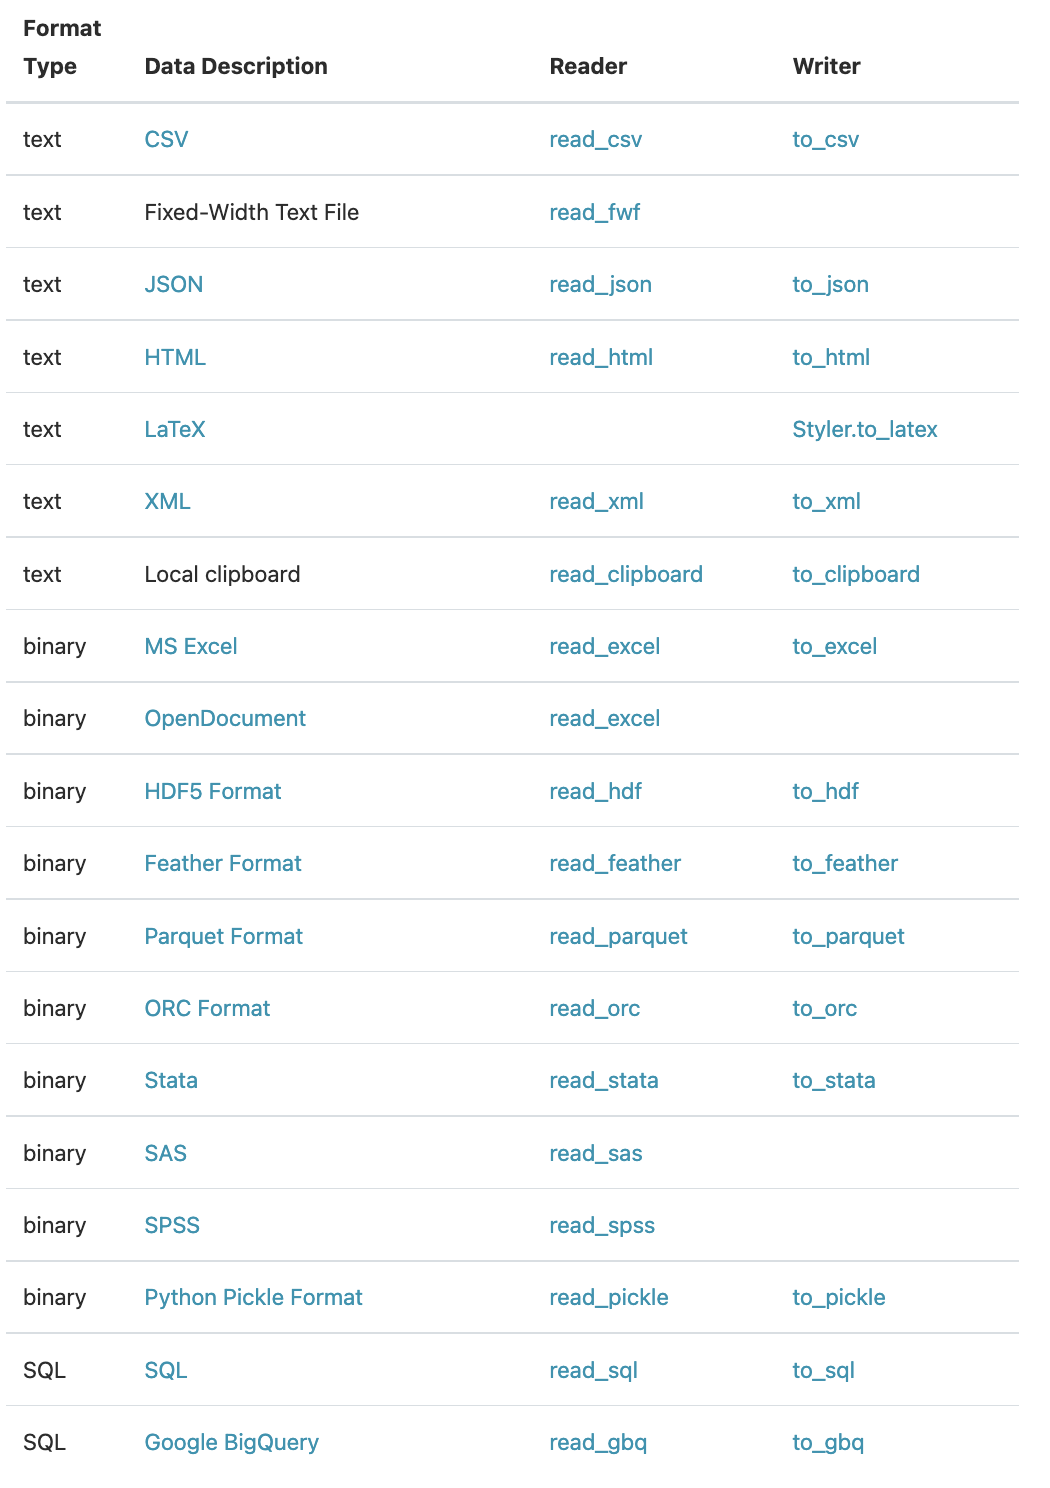
<style>img{width:500px;}</style>

##### Read Excel files:

In [7]:
# install the excel reader backend
# !pip install openpyxl --upgrade openpyxl

In [8]:
df= pd.read_excel('input/techstocks.xlsx',sheet_name='main')
df

#df.to_csv('/location/...csv')

,PERMNO,Names Date,Ticker Symbol,Company Name,Price or Bid/Ask Average,Returns,Return on the S&P 500 Index
0,14542,2018-01-02,GOOG,ALPHABET INC,1065.000000,0.017775,0.008303
1,14542,2018-01-03,GOOG,ALPHABET INC,1082.479980,0.016413,0.006399
2,14542,2018-01-04,GOOG,ALPHABET INC,1086.400024,0.003621,0.004029
3,14542,2018-01-05,GOOG,ALPHABET INC,1102.229980,0.014571,0.007034
4,14542,2018-01-08,GOOG,ALPHABET INC,1106.939941,0.004273,0.001662
...,...,...,...,...,...,...,...
3019,89393,2020-12-24,NFLX,NETFLIX INC,513.969971,-0.000991,0.003537
3020,89393,2020-12-28,NFLX,NETFLIX INC,519.119995,0.010020,0.008723
3021,89393,2020-12-29,NFLX,NETFLIX INC,530.869995,0.022634,-0.002227
3022,89393,2020-12-30,NFLX,NETFLIX INC,524.590027,-0.011830,0.001342


## Indexing and Selecting


* Filtering

In [9]:
#df['Ticker Symbol']        #This accesses the 'Ticker Symbol' column in the DataFrame df. It returns a Pandas Series.
#list(df['Ticker Symbol'])  #Converts that Series into a Python list. Useful for iteration or exporting.
set(df['Ticker Symbol'])    #This returns a set of unique values from the 'Ticker Symbol' column (removing duplicates).

{'AAPL', 'AMZN', 'GOOG', 'NFLX'}

In [10]:
AAPL = df[df['Ticker Symbol']=='AAPL'] #It filters the DataFrame df to only include rows where the 'Ticker Symbol' is 'AAPL'.

AAPL # need reindexing

,PERMNO,Names Date,Ticker Symbol,Company Name,Price or Bid/Ask Average,Returns,Return on the S&P 500 Index
756,14593,2018-01-02,AAPL,APPLE INC,172.259995,0.017905,0.008303
757,14593,2018-01-03,AAPL,APPLE INC,172.229996,-0.000174,0.006399
758,14593,2018-01-04,AAPL,APPLE INC,173.029999,0.004645,0.004029
759,14593,2018-01-05,AAPL,APPLE INC,175.000000,0.011385,0.007034
760,14593,2018-01-08,AAPL,APPLE INC,174.350006,-0.003714,0.001662
...,...,...,...,...,...,...,...
1507,14593,2020-12-24,AAPL,APPLE INC,131.970001,0.007712,0.003537
1508,14593,2020-12-28,AAPL,APPLE INC,136.690002,0.035766,0.008723
1509,14593,2020-12-29,AAPL,APPLE INC,134.869995,-0.013315,-0.002227
1510,14593,2020-12-30,AAPL,APPLE INC,133.720001,-0.008527,0.001342


In [11]:
AAPL = AAPL.reset_index(drop=True)  # drop=True: This tells Pandas not to keep the old index as a new column. If you left it as drop=False (default), the old index would be saved as a column in the DataFrame.

AAPL

,PERMNO,Names Date,Ticker Symbol,Company Name,Price or Bid/Ask Average,Returns,Return on the S&P 500 Index
0,14593,2018-01-02,AAPL,APPLE INC,172.259995,0.017905,0.008303
1,14593,2018-01-03,AAPL,APPLE INC,172.229996,-0.000174,0.006399
2,14593,2018-01-04,AAPL,APPLE INC,173.029999,0.004645,0.004029
3,14593,2018-01-05,AAPL,APPLE INC,175.000000,0.011385,0.007034
4,14593,2018-01-08,AAPL,APPLE INC,174.350006,-0.003714,0.001662
...,...,...,...,...,...,...,...
751,14593,2020-12-24,AAPL,APPLE INC,131.970001,0.007712,0.003537
752,14593,2020-12-28,AAPL,APPLE INC,136.690002,0.035766,0.008723
753,14593,2020-12-29,AAPL,APPLE INC,134.869995,-0.013315,-0.002227
754,14593,2020-12-30,AAPL,APPLE INC,133.720001,-0.008527,0.001342


In [59]:
AAPL.iloc[0]        # iloc stands for integer location, The result will be a Pandas Series representing that row.

AAPL.iloc[0,-2:]    # -2: means the last two columns of that row.

Returns                        0.017905
Return on the S&P 500 Index    0.008303
Name: 756, dtype: object

In [13]:
AAPL.loc[0, 'PERMNO']

np.int64(14593)

In [14]:
AAPL[['Names Date','Price or Bid/Ask Average']]

,Names Date,Price or Bid/Ask Average
0,2018-01-02,172.259995
1,2018-01-03,172.229996
2,2018-01-04,173.029999
3,2018-01-05,175.000000
4,2018-01-08,174.350006
...,...,...
751,2020-12-24,131.970001
752,2020-12-28,136.690002
753,2020-12-29,134.869995
754,2020-12-30,133.720001


* **multiple conditions**


In [15]:
MySample= df[(df['Names Date'] > pd.to_datetime('2020-01-01', format='%Y-%m-%d'))  # comparing date
         & (df['Price or Bid/Ask Average']>100)                                     # comparing numbers
         & (df['Ticker Symbol'].isin(['AAPL']))                                     # check if in list of data
         & (df.PERMNO.notna())]                                                     # check if not missing a data point


MySample.reset_index()

,index,PERMNO,Names Date,Ticker Symbol,Company Name,Price or Bid/Ask Average,Returns,Return on the S&P 500 Index
0,1259,14593,2020-01-02,AAPL,APPLE INC,300.350006,0.022816,0.008379
1,1260,14593,2020-01-03,AAPL,APPLE INC,297.429993,-0.009722,-0.007060
2,1261,14593,2020-01-06,AAPL,APPLE INC,299.799988,0.007968,0.003533
3,1262,14593,2020-01-07,AAPL,APPLE INC,298.390015,-0.004703,-0.002803
4,1263,14593,2020-01-08,AAPL,APPLE INC,303.190002,0.016086,0.004902
...,...,...,...,...,...,...,...,...
248,1507,14593,2020-12-24,AAPL,APPLE INC,131.970001,0.007712,0.003537
249,1508,14593,2020-12-28,AAPL,APPLE INC,136.690002,0.035766,0.008723
250,1509,14593,2020-12-29,AAPL,APPLE INC,134.869995,-0.013315,-0.002227
251,1510,14593,2020-12-30,AAPL,APPLE INC,133.720001,-0.008527,0.001342


## Basic Analytics

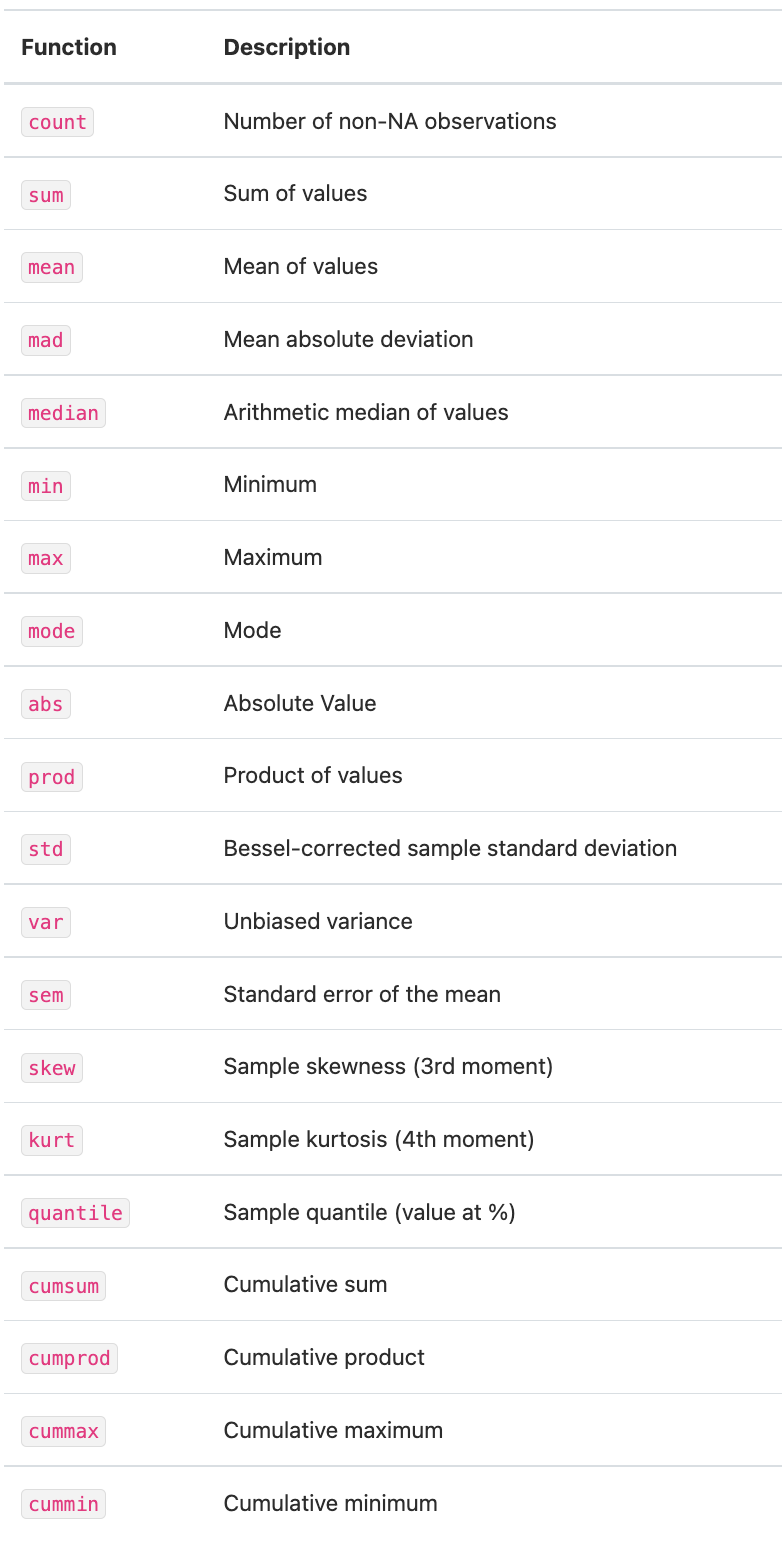
<style>img{width:500px;}</style>

In [16]:
AAPL['Price or Bid/Ask Average'].describe()

#AAPL['Price or Bid/Ask Average'].mean()
#AAPL['Price or Bid/Ask Average'].std()


#import numpy as np
#np.mean(AAPL['Price or Bid/Ask Average'])

count    756.000000
mean     219.166462
std       75.851697
min      106.839996
25%      174.169994
50%      200.644997
75%      257.735001
max      506.089996
Name: Price or Bid/Ask Average, dtype: float64

### Self defined Functions


In [17]:
def ToPercent(x):
    return x* 100


AAPL['%returns'] = AAPL['Returns'].map(ToPercent) # map ~ apply

AAPL

,PERMNO,Names Date,Ticker Symbol,Company Name,Price or Bid/Ask Average,Returns,Return on the S&P 500 Index,%returns
0,14593,2018-01-02,AAPL,APPLE INC,172.259995,0.017905,0.008303,1.790462
1,14593,2018-01-03,AAPL,APPLE INC,172.229996,-0.000174,0.006399,-0.017415
2,14593,2018-01-04,AAPL,APPLE INC,173.029999,0.004645,0.004029,0.464497
3,14593,2018-01-05,AAPL,APPLE INC,175.000000,0.011385,0.007034,1.138532
4,14593,2018-01-08,AAPL,APPLE INC,174.350006,-0.003714,0.001662,-0.371425
...,...,...,...,...,...,...,...,...
751,14593,2020-12-24,AAPL,APPLE INC,131.970001,0.007712,0.003537,0.771224
752,14593,2020-12-28,AAPL,APPLE INC,136.690002,0.035766,0.008723,3.576571
753,14593,2020-12-29,AAPL,APPLE INC,134.869995,-0.013315,-0.002227,-1.331485
754,14593,2020-12-30,AAPL,APPLE INC,133.720001,-0.008527,0.001342,-0.852668


* Lambda as function

In [18]:
AAPL['%returns'] = AAPL['Returns'].map(lambda x: x*100)     # It’s a quick way to write a simple function without naming it.
AAPL

,PERMNO,Names Date,Ticker Symbol,Company Name,Price or Bid/Ask Average,Returns,Return on the S&P 500 Index,%returns
0,14593,2018-01-02,AAPL,APPLE INC,172.259995,0.017905,0.008303,1.790462
1,14593,2018-01-03,AAPL,APPLE INC,172.229996,-0.000174,0.006399,-0.017415
2,14593,2018-01-04,AAPL,APPLE INC,173.029999,0.004645,0.004029,0.464497
3,14593,2018-01-05,AAPL,APPLE INC,175.000000,0.011385,0.007034,1.138532
4,14593,2018-01-08,AAPL,APPLE INC,174.350006,-0.003714,0.001662,-0.371425
...,...,...,...,...,...,...,...,...
751,14593,2020-12-24,AAPL,APPLE INC,131.970001,0.007712,0.003537,0.771224
752,14593,2020-12-28,AAPL,APPLE INC,136.690002,0.035766,0.008723,3.576571
753,14593,2020-12-29,AAPL,APPLE INC,134.869995,-0.013315,-0.002227,-1.331485
754,14593,2020-12-30,AAPL,APPLE INC,133.720001,-0.008527,0.001342,-0.852668


## GroupBy Operations


In [19]:
groups = df.groupby('Ticker Symbol')

groups

In [20]:
groups['Returns'].describe()

,count,mean,std,min,25%,50%,75%,max
Ticker Symbol,,,,,,,,
AAPL,756.0,0.001809,0.022105,-0.128647,-0.007833,0.001649,0.012230,0.119808
AMZN,756.0,0.001574,0.020916,-0.079221,-0.007994,0.001702,0.011851,0.094452
GOOG,756.0,0.000870,0.019383,-0.111008,-0.007027,0.001416,0.011011,0.104485
NFLX,756.0,0.001733,0.026916,-0.111375,-0.012847,0.000876,0.017210,0.116087


In [21]:
groups['Returns'].count()

Ticker Symbol
AAPL    756
AMZN    756
GOOG    756
NFLX    756
Name: Returns, dtype: int64

* List of functions:


| Function   	| Description                                	|
|------------	|--------------------------------------------	|
| mean()     	| Calculates the average value of each group.                     	|
| sum()      	| Adds up all the values in each group.                	|
| size()     	| Returns the number of rows in each group, including NaNs.                       	|
| count()    	| Returns the number of non-null entries in each group.                     	|
| std()      	| Measures the spread (standard deviation) within each group.             	|
| var()      	| Measures the variance (spread squared) within each group.                 	|
| sem()      	| Returns the standard error of the mean for each group.       	|
| describe() 	| Provides a full summary (descriptive statistics): count, mean, std, min, max, quartiles.            	|
| first()    	| Returns the first row in each group.              	|
| last()     	| Returns the last row in each group.              	|
| nth()      	| Returns the nth row in each group (e.g., .nth(1) = second row), or a subset if n is a list. 	|
| min()      	| Returns the minimum value in each group.                	|
| max()      	| Returns the maximum value in each group.                	|

In [22]:
groups['Returns'].max()



Ticker Symbol
AAPL    0.119808
AMZN    0.094452
GOOG    0.104485
NFLX    0.116087
Name: Returns, dtype: float64

or you can use any function.

Here are examples of predefined **NumPy** methods:

In [23]:
groups['Returns'].aggregate([np.min,np.max,np.std,np.sum])

C:\Users\sharafi\AppData\Local\Temp\ipykernel_26868\2363135725.py:1: FutureWarning: The provided callable <function min at 0x0000028B7C43B1A0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  groups['Returns'].aggregate([np.min,np.max,np.std,np.sum])
C:\Users\sharafi\AppData\Local\Temp\ipykernel_26868\2363135725.py:1: FutureWarning: The provided callable <function max at 0x0000028B7C43B060> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  groups['Returns'].aggregate([np.min,np.max,np.std,np.sum])
C:\Users\sharafi\AppData\Local\Temp\ipykernel_26868\2363135725.py:1: FutureWarning: The provided callable <function std at 0x0000028B7C43BBA0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used direc

,min,max,std,sum
Ticker Symbol,,,,
AAPL,-0.128647,0.119808,0.022105,1.367297
AMZN,-0.079221,0.094452,0.020916,1.189970
GOOG,-0.111008,0.104485,0.019383,0.657655
NFLX,-0.111375,0.116087,0.026916,1.309841


or a self-defined **lambda** function

In [24]:
groups['Returns'].aggregate(lambda x: sum(x)**2 +8)

Ticker Symbol
AAPL    9.869501
AMZN    9.416029
GOOG    8.432511
NFLX    9.715683
Name: Returns, dtype: float64

## Excercise 1:
### a) Which ticker contains the most positive returns?

In [25]:
positive_counts = groups['Returns'].aggregate(lambda x: (x > 0).sum())
print(positive_counts, "\n")

most_positive_ticker_name = positive_counts.idxmax()
max_count = positive_counts.max()

print(f"{most_positive_ticker_name} has the most positive returns: {max_count}")

Ticker Symbol
AAPL    413
AMZN    421
GOOG    413
NFLX    391
Name: Returns, dtype: int64 

AMZN has the most positive returns: 421


### b) Which shares have the highest Sharpe Ratio?
Definition: The Sharpe Ratio is a key metric in finance used to measure the performance of an investment compared to a risk-free asset, after adjusting for its risk.

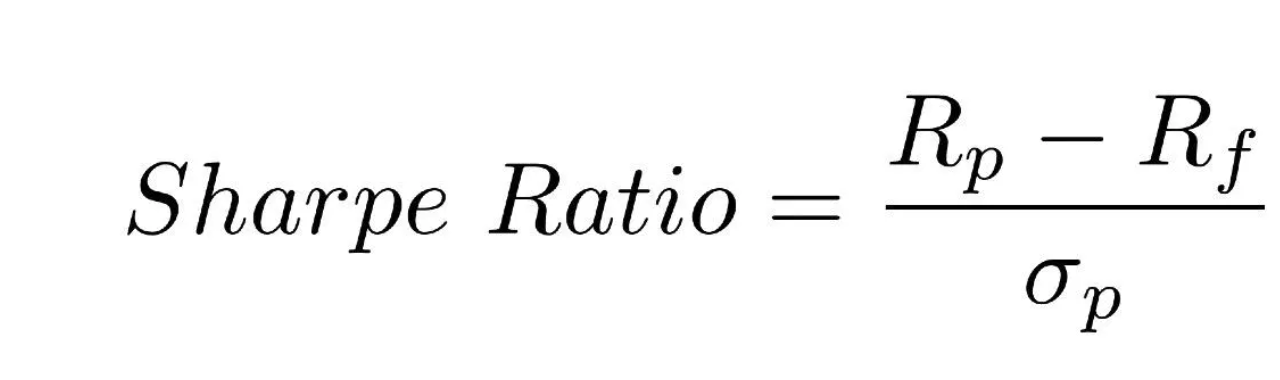
<style>img{width:400px;}</style>

𝑅𝑝 = mean portfolio/stock return
𝑅𝑓 = risk-free rate (often set to 0 for simplicity)
𝜎𝑝 = standard deviation of returns (volatility)

assume a Risk free rate of 0%

In [26]:
risk_free_rate = 0  

def sharpe_ratio(returns):
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std()

sharpe_ratios = groups['Returns'].apply(sharpe_ratio)

max_sharpe_ticker = sharpe_ratios.idxmax()
max_sharpe_value = sharpe_ratios.max()

print(f"{max_sharpe_ticker} has the highest Sharpe Ratio: {max_sharpe_value}")

sharpe_ratios

AAPL has the highest Sharpe Ratio: 0.0818177366887755


Ticker Symbol
AAPL    0.081818
AMZN    0.075253
GOOG    0.044881
NFLX    0.064371
Name: Returns, dtype: float64

### c) Which **day** these four companies had the most simliar returns (i.e., least standard deviations)?

Hint: group by date!

Hint: you can sort a series using **.sort_values()**

In [27]:
daily_std = df.groupby('Names Date')['Returns'].std() # SD of returns for each date.
daily_std

Names Date
2018-01-02    0.015007
2018-01-03    0.008734
2018-01-04    0.000839
2018-01-05    0.004096
2018-01-08    0.007803
                ...   
2020-12-24    0.005145
2020-12-28    0.012292
2020-12-29    0.017209
2020-12-30    0.001411
2020-12-31    0.018437
Name: Returns, Length: 756, dtype: float64

In [28]:
most_similar_day = daily_std.sort_values().index[0]
lowest_std = daily_std.sort_values().iloc[0]
print(f"The day with the most similar returns was: {most_similar_day}, with a standard deviation of {lowest_std:.5f}")

The day with the most similar returns was: 2018-01-04 00:00:00, with a standard deviation of 0.00084


## Reshaping Data
* See also: https://pandas.pydata.org/docs/user_guide/reshaping.html for Stacking and Melting
* And also here: https://github.com/pytopia/Data-Processing-for-ML/blob/main/Lectures/04%20Pandas%20Fundamentals/16%20Reshaping%20Data%3A%20Pivoting%2C%20Melting%2C%20Stacking%2C%20and%20Unstacking.ipynb


```Python
df:
```

|   Date   	| Company 	| Return 	|
|:--------:	|:-------:	|:------:	|
| 1-1-2018 	|  Google 	|   100  	|
| 1-1-2018 	|  Apple  	|   220  	|
| 2-1-2018 	| Google  	|  101   	|
| 2-1-2018 	|  Apple  	|   223  	|
| ...      	| ...     	| ...    	|

```Python
df.pivot(index='Names Date', columns=['Ticker Symbol'], values=['Returns']):
```


|   Date   	| Google Return 	| Apple Return 	| ... 	|
|:--------:	|:-------------:	|:------------:	|-----	|
| 1-1-2018 	|        100       	|   220           	|     	|
|    ...   	|           ...    	|   ...           	|     	|

In [29]:
df.sort_values('Names Date')


,PERMNO,Names Date,Ticker Symbol,Company Name,Price or Bid/Ask Average,Returns,Return on the S&P 500 Index
0,14542,2018-01-02,GOOG,ALPHABET INC,1065.000000,0.017775,0.008303
756,14593,2018-01-02,AAPL,APPLE INC,172.259995,0.017905,0.008303
2268,89393,2018-01-02,NFLX,NETFLIX INC,201.070007,0.047458,0.008303
1512,84788,2018-01-02,AMZN,AMAZON COM INC,1189.010010,0.016708,0.008303
2269,89393,2018-01-03,NFLX,NETFLIX INC,205.050003,0.019794,0.006399
...,...,...,...,...,...,...,...
754,14542,2020-12-30,GOOG,ALPHABET INC,1739.520020,-0.010917,0.001342
1511,14593,2020-12-31,AAPL,APPLE INC,132.690002,-0.007703,0.006439
755,14542,2020-12-31,GOOG,ALPHABET INC,1751.880005,0.007105,0.006439
2267,84788,2020-12-31,AMZN,AMAZON COM INC,3256.929932,-0.008801,0.006439


In [30]:
MyPivot = df.pivot(index='Names Date', columns=['Ticker Symbol'],values=['Price or Bid/Ask Average','Returns'])

#Rows will be grouped by the date.
#The ticker names will become column headers.
#You want to fill the table with these two values per ticker.

MyPivot

Price or Bid/Ask Average                                        \
Ticker Symbol                     AAPL         AMZN         GOOG        NFLX   
Names Date                                                                     
2018-01-02                  172.259995  1189.010010  1065.000000  201.070007   
2018-01-03                  172.229996  1204.199951  1082.479980  205.050003   
2018-01-04                  173.029999  1209.589966  1086.400024  205.630005   
2018-01-05                  175.000000  1229.140015  1102.229980  209.990005   
2018-01-08                  174.350006  1246.869995  1106.939941  212.050003   
...                                ...          ...          ...         ...   
2020-12-24                  131.970001  3172.689941  1738.849976  513.969971   
2020-12-28                  136.690002  3283.959961  1776.089966  519.119995   
2020-12-29                  134.869995  3322.000000  1758.719971  530.869995   
2020-12-30                  133.720001  3285.850098  1739.520020  524.590027   
2020-12-31                  132.690002  3256.929932  1751.880005  540.729980   

                Returns                                
Ticker Symbol      AAPL      AMZN      GOOG      NFLX  
Names Date                                             
2018-01-02     0.017905  0.016708  0.017775  0.047458  
2018-01-03    -0.000174  0.012775  0.016413  0.019794  
2018-01-04     0.004645  0.004476  0.003621  0.002829  
2018-01-05     0.011385  0.016163  0.014571  0.021203  
2018-01-08    -0.003714  0.014425  0.004273  0.009810  
...                 ...       ...       ...       ...  
2020-12-24     0.007712 -0.003949  0.003735 -0.000991  
2020-12-28     0.035766  0.035071  0.021416  0.010020  
2020-12-29    -0.013315  0.011584 -0.009780  0.022634  
2020-12-30    -0.008527 -0.010882 -0.010917 -0.011830  
2020-12-31    -0.007703 -0.008801  0.007105  0.030767  

[756 rows x 8 columns]

In [31]:
MyPivot.columns

#MyPivot[('Returns', 'AAPL')]

MultiIndex([('Price or Bid/Ask Average', 'AAPL'),
            ('Price or Bid/Ask Average', 'AMZN'),
            ('Price or Bid/Ask Average', 'GOOG'),
            ('Price or Bid/Ask Average', 'NFLX'),
            (                 'Returns', 'AAPL'),
            (                 'Returns', 'AMZN'),
            (                 'Returns', 'GOOG'),
            (                 'Returns', 'NFLX')],
           names=[None, 'Ticker Symbol'])

#
#
## Excercise:
Flatten the columns names in the MyPivot dataframe: 
#


### Melt

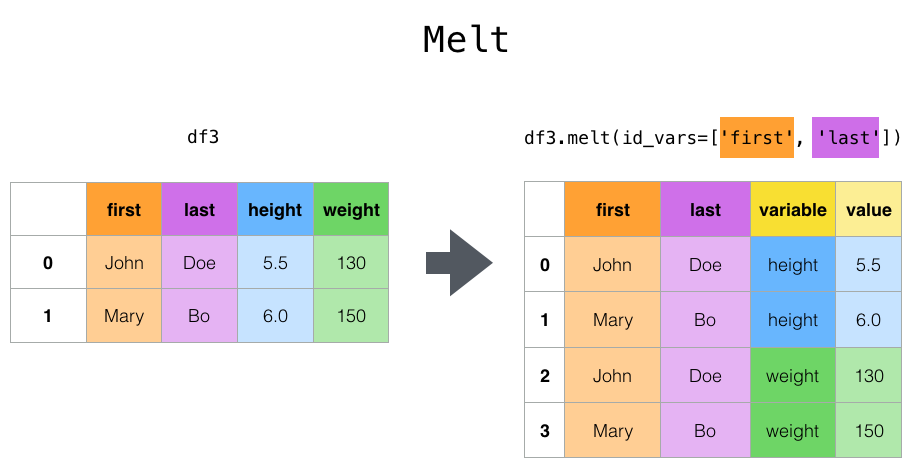



The melt() function does the opposite of pivot(). It converts wide format → long format. This is useful for reshaping your DataFrame when you want to make your data tidy.


In [32]:
MyPivot.melt(id_vars=[ ('Returns', 'AAPL'),
            (                 'Returns', 'AMZN'),
            (                 'Returns', 'GOOG'),
            (                 'Returns', 'NFLX')])

,"(Returns, AAPL)","(Returns, AMZN)","(Returns, GOOG)","(Returns, NFLX)",None,Ticker Symbol,value
0,0.017905,0.016708,0.017775,0.047458,Price or Bid/Ask Average,AAPL,172.259995
1,-0.000174,0.012775,0.016413,0.019794,Price or Bid/Ask Average,AAPL,172.229996
2,0.004645,0.004476,0.003621,0.002829,Price or Bid/Ask Average,AAPL,173.029999
3,0.011385,0.016163,0.014571,0.021203,Price or Bid/Ask Average,AAPL,175.000000
4,-0.003714,0.014425,0.004273,0.009810,Price or Bid/Ask Average,AAPL,174.350006
...,...,...,...,...,...,...,...
3019,0.007712,-0.003949,0.003735,-0.000991,Price or Bid/Ask Average,NFLX,513.969971
3020,0.035766,0.035071,0.021416,0.010020,Price or Bid/Ask Average,NFLX,519.119995
3021,-0.013315,0.011584,-0.009780,0.022634,Price or Bid/Ask Average,NFLX,530.869995
3022,-0.008527,-0.010882,-0.010917,-0.011830,Price or Bid/Ask Average,NFLX,524.590027


## Merging and Concatenating DataFrames
See more here: https://github.com/pytopia/Data-Processing-for-ML/blob/main/Lectures/04%20Pandas%20Fundamentals/14%20Merging%2C%20Joining%2C%20and%20Concatenating%20DataFrames.ipynb

concat() is used to combine two or more DataFrames either vertically (row-wise) or horizontally (column-wise).

In [33]:
AAPL = df[df['Ticker Symbol']=='AAPL']
GOOG = df[df['Ticker Symbol']=='GOOG']

pd.concat([AAPL,GOOG])#.reset_index()

,PERMNO,Names Date,Ticker Symbol,Company Name,Price or Bid/Ask Average,Returns,Return on the S&P 500 Index
756,14593,2018-01-02,AAPL,APPLE INC,172.259995,0.017905,0.008303
757,14593,2018-01-03,AAPL,APPLE INC,172.229996,-0.000174,0.006399
758,14593,2018-01-04,AAPL,APPLE INC,173.029999,0.004645,0.004029
759,14593,2018-01-05,AAPL,APPLE INC,175.000000,0.011385,0.007034
760,14593,2018-01-08,AAPL,APPLE INC,174.350006,-0.003714,0.001662
...,...,...,...,...,...,...,...
751,14542,2020-12-24,GOOG,ALPHABET INC,1738.849976,0.003735,0.003537
752,14542,2020-12-28,GOOG,ALPHABET INC,1776.089966,0.021416,0.008723
753,14542,2020-12-29,GOOG,ALPHABET INC,1758.719971,-0.009780,-0.002227
754,14542,2020-12-30,GOOG,ALPHABET INC,1739.520020,-0.010917,0.001342


### Merging

1. In this section we first prepare a second data set, i.e. Volatility index (**VIX**)
2. We merge the **df** with the **VIX** dataset


#### 1

In [34]:
# let's import other data

!pip install yfinance
import yfinance as yf  # Yahoo! finance library could come handy in downloading some market data
                        # https://github.com/ranaroussi/yfinance



VIX= yf.download('^VIX',start="2010-01-02", end="2019-12-30")

# You're using yfinance to download historical market data for the VIX (Volatility Index), which measures market expectations of volatility (often called the "fear index").
# '^VIX' is the ticker

VIX

Defaulting to user installation because normal site-packages is not writeable


C:\Users\sharafi\AppData\Local\Temp\ipykernel_26868\2336826202.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  VIX= yf.download('^VIX',start="2010-01-02", end="2019-12-30")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^VIX,^VIX,^VIX,^VIX,^VIX
Date,,,,,
2010-01-04,20.040001,21.680000,20.030001,21.680000,0
2010-01-05,19.350000,20.129999,19.340000,20.049999,0
2010-01-06,19.160000,19.680000,18.770000,19.590000,0
2010-01-07,19.059999,19.709999,18.700001,19.680000,0
2010-01-08,18.129999,19.270000,18.110001,19.270000,0
...,...,...,...,...,...
2019-12-20,12.510000,12.610000,12.040000,12.550000,0
2019-12-23,12.610000,12.900000,12.410000,12.810000,0


In [35]:
VIX['date']= VIX.index

VIX=VIX.reset_index(drop=True)


VIX

Price,Close,High,Low,Open,Volume,date
Ticker,^VIX,^VIX,^VIX,^VIX,^VIX,
0,20.040001,21.680000,20.030001,21.680000,0,2010-01-04
1,19.350000,20.129999,19.340000,20.049999,0,2010-01-05
2,19.160000,19.680000,18.770000,19.590000,0,2010-01-06
3,19.059999,19.709999,18.700001,19.680000,0,2010-01-07
4,18.129999,19.270000,18.110001,19.270000,0,2010-01-08
...,...,...,...,...,...,...
2509,12.510000,12.610000,12.040000,12.550000,0,2019-12-20
2510,12.610000,12.900000,12.410000,12.810000,0,2019-12-23
2511,12.670000,12.840000,12.560000,12.650000,0,2019-12-24


In [36]:
VIX = VIX[['date','Close']]  # keep only the desired columns

VIX=VIX.rename(columns={'Close':'VIX'}) # rename in a way to be appropriate in the merged dataset

VIX

Price,date,VIX
Ticker,,^VIX
0,2010-01-04,20.040001
1,2010-01-05,19.350000
2,2010-01-06,19.160000
3,2010-01-07,19.059999
4,2010-01-08,18.129999
...,...,...
2509,2019-12-20,12.510000
2510,2019-12-23,12.610000
2511,2019-12-24,12.670000


#### 2

In Pandas, a simple merge method is defined as:

```Python
pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, suffixes=('_x', '_y'))
```

you basically need at least: 2 DataFrames(**left** & **right**) + merging **on** the Key + **how**


In our case:
* left = **AAPL**
* right = **VIX**
* key = **Names Date** on right , **date** on left

* how: ?

![](https://sasanm.de/img/dafa/02-03.png)
![](https://sasanm.de/img/dafa/02-04.png)
![](https://sasanm.de/img/dafa/02-05.png)
![](https://sasanm.de/img/dafa/02-06.png)



source: https://stackoverflow.com/questions/53645882/pandas-merging-101

In [37]:
VIX['date']= VIX.date.dt.tz_localize(None)

#This is often done to ensure consistency in datetime formats—especially before merging with other datasets that may not have timezones.

In [38]:
if isinstance(VIX.columns, pd.MultiIndex):
     VIX.columns = VIX.columns.get_level_values(0)

#  for example:
#  VIX.columns = [('Close', ''), ('Open', ''), ('High', '')]  # MultiIndex
#  VIX.columns = ['Close', 'Open', 'High']  # Flat, clean column names


In [39]:
pd.merge(AAPL,VIX, how='inner', left_on='Names Date', right_on='date')


,PERMNO,Names Date,Ticker Symbol,Company Name,Price or Bid/Ask Average,Returns,Return on the S&P 500 Index,date,VIX
0,14593,2018-01-02,AAPL,APPLE INC,172.259995,0.017905,0.008303,2018-01-02,9.77
1,14593,2018-01-03,AAPL,APPLE INC,172.229996,-0.000174,0.006399,2018-01-03,9.15
2,14593,2018-01-04,AAPL,APPLE INC,173.029999,0.004645,0.004029,2018-01-04,9.22
3,14593,2018-01-05,AAPL,APPLE INC,175.000000,0.011385,0.007034,2018-01-05,9.22
4,14593,2018-01-08,AAPL,APPLE INC,174.350006,-0.003714,0.001662,2018-01-08,9.52
...,...,...,...,...,...,...,...,...,...
496,14593,2019-12-20,AAPL,APPLE INC,279.440002,-0.002071,0.004945,2019-12-20,12.51
497,14593,2019-12-23,AAPL,APPLE INC,284.000000,0.016318,0.000866,2019-12-23,12.61
498,14593,2019-12-24,AAPL,APPLE INC,284.269989,0.000951,-0.000195,2019-12-24,12.67
499,14593,2019-12-26,AAPL,APPLE INC,289.910004,0.019840,0.005128,2019-12-26,12.65


In [40]:
pd.merge(AAPL,VIX, how='left', left_on='Names Date', right_on='date')


,PERMNO,Names Date,Ticker Symbol,Company Name,Price or Bid/Ask Average,Returns,Return on the S&P 500 Index,date,VIX
0,14593,2018-01-02,AAPL,APPLE INC,172.259995,0.017905,0.008303,2018-01-02,9.77
1,14593,2018-01-03,AAPL,APPLE INC,172.229996,-0.000174,0.006399,2018-01-03,9.15
2,14593,2018-01-04,AAPL,APPLE INC,173.029999,0.004645,0.004029,2018-01-04,9.22
3,14593,2018-01-05,AAPL,APPLE INC,175.000000,0.011385,0.007034,2018-01-05,9.22
4,14593,2018-01-08,AAPL,APPLE INC,174.350006,-0.003714,0.001662,2018-01-08,9.52
...,...,...,...,...,...,...,...,...,...
751,14593,2020-12-24,AAPL,APPLE INC,131.970001,0.007712,0.003537,NaT,NaN
752,14593,2020-12-28,AAPL,APPLE INC,136.690002,0.035766,0.008723,NaT,NaN
753,14593,2020-12-29,AAPL,APPLE INC,134.869995,-0.013315,-0.002227,NaT,NaN
754,14593,2020-12-30,AAPL,APPLE INC,133.720001,-0.008527,0.001342,NaT,NaN


#### Validate the merge as "1:1" or "m:1"or ...


In [41]:
pd.merge(AAPL,VIX, how='left', left_on='Names Date', right_on='date', validate='1:1')


,PERMNO,Names Date,Ticker Symbol,Company Name,Price or Bid/Ask Average,Returns,Return on the S&P 500 Index,date,VIX
0,14593,2018-01-02,AAPL,APPLE INC,172.259995,0.017905,0.008303,2018-01-02,9.77
1,14593,2018-01-03,AAPL,APPLE INC,172.229996,-0.000174,0.006399,2018-01-03,9.15
2,14593,2018-01-04,AAPL,APPLE INC,173.029999,0.004645,0.004029,2018-01-04,9.22
3,14593,2018-01-05,AAPL,APPLE INC,175.000000,0.011385,0.007034,2018-01-05,9.22
4,14593,2018-01-08,AAPL,APPLE INC,174.350006,-0.003714,0.001662,2018-01-08,9.52
...,...,...,...,...,...,...,...,...,...
751,14593,2020-12-24,AAPL,APPLE INC,131.970001,0.007712,0.003537,NaT,NaN
752,14593,2020-12-28,AAPL,APPLE INC,136.690002,0.035766,0.008723,NaT,NaN
753,14593,2020-12-29,AAPL,APPLE INC,134.869995,-0.013315,-0.002227,NaT,NaN
754,14593,2020-12-30,AAPL,APPLE INC,133.720001,-0.008527,0.001342,NaT,NaN


## Ploting


* We will cover more on ploting in the next sessions

* **DataFrame.plot()** Make plots of Series or DataFrame.

> See documantations <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html"> here</a>


* By default, matplotlib is used as the backend

Source : https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [42]:
# create the dataframe
GOOG = df[df['Ticker Symbol']=='GOOG']

GOOG

,PERMNO,Names Date,Ticker Symbol,Company Name,Price or Bid/Ask Average,Returns,Return on the S&P 500 Index
0,14542,2018-01-02,GOOG,ALPHABET INC,1065.000000,0.017775,0.008303
1,14542,2018-01-03,GOOG,ALPHABET INC,1082.479980,0.016413,0.006399
2,14542,2018-01-04,GOOG,ALPHABET INC,1086.400024,0.003621,0.004029
3,14542,2018-01-05,GOOG,ALPHABET INC,1102.229980,0.014571,0.007034
4,14542,2018-01-08,GOOG,ALPHABET INC,1106.939941,0.004273,0.001662
...,...,...,...,...,...,...,...
751,14542,2020-12-24,GOOG,ALPHABET INC,1738.849976,0.003735,0.003537
752,14542,2020-12-28,GOOG,ALPHABET INC,1776.089966,0.021416,0.008723
753,14542,2020-12-29,GOOG,ALPHABET INC,1758.719971,-0.009780,-0.002227
754,14542,2020-12-30,GOOG,ALPHABET INC,1739.520020,-0.010917,0.001342


<Axes: ylabel='Frequency'>

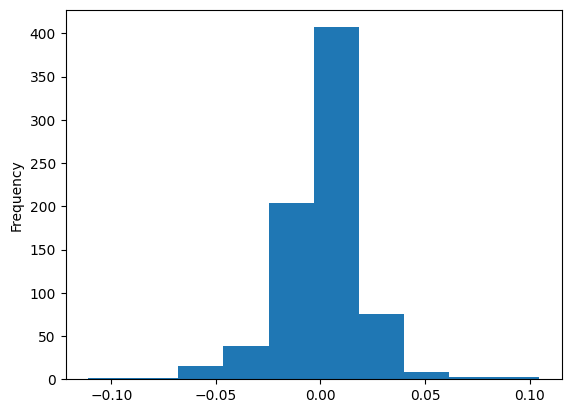

In [43]:
GOOG['Returns'].plot(kind="hist")
# GOOG['Returns'].plot(kind="line")

In [44]:
#!pip install scipy

<Axes: >

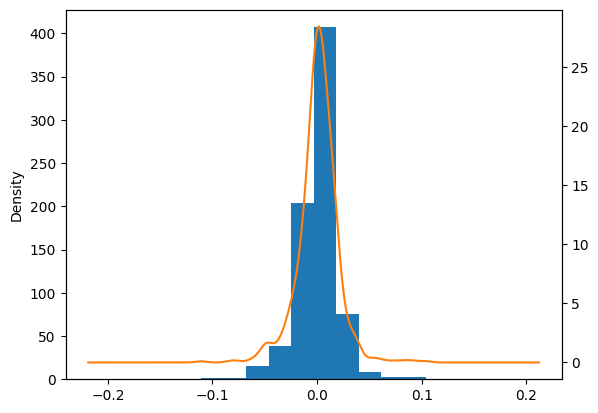

In [45]:
GOOG['Returns'].plot(kind="hist")
GOOG['Returns'].plot(kind="kde",secondary_y=True)

# Kernel Density Estimate (KDE) curve of the 'Returns' column. KDE is a smoothed version of a histogram that estimates the probability density function of the data.

<Axes: xlabel='Names Date'>

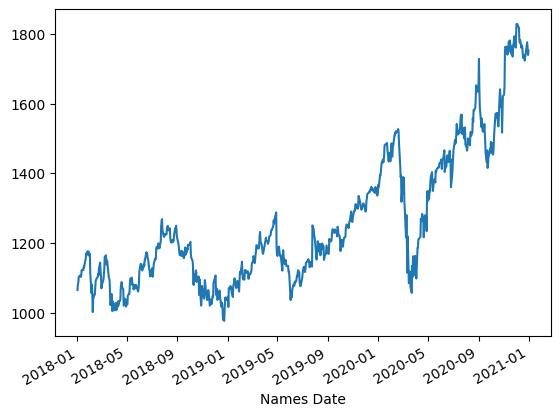

In [46]:
GOOG=GOOG.set_index('Names Date')
GOOG['Price or Bid/Ask Average'].plot()

In [47]:
df= pd.read_excel('input/techstocks.xlsx',sheet_name='main')
df


,PERMNO,Names Date,Ticker Symbol,Company Name,Price or Bid/Ask Average,Returns,Return on the S&P 500 Index
0,14542,2018-01-02,GOOG,ALPHABET INC,1065.000000,0.017775,0.008303
1,14542,2018-01-03,GOOG,ALPHABET INC,1082.479980,0.016413,0.006399
2,14542,2018-01-04,GOOG,ALPHABET INC,1086.400024,0.003621,0.004029
3,14542,2018-01-05,GOOG,ALPHABET INC,1102.229980,0.014571,0.007034
4,14542,2018-01-08,GOOG,ALPHABET INC,1106.939941,0.004273,0.001662
...,...,...,...,...,...,...,...
3019,89393,2020-12-24,NFLX,NETFLIX INC,513.969971,-0.000991,0.003537
3020,89393,2020-12-28,NFLX,NETFLIX INC,519.119995,0.010020,0.008723
3021,89393,2020-12-29,NFLX,NETFLIX INC,530.869995,0.022634,-0.002227
3022,89393,2020-12-30,NFLX,NETFLIX INC,524.590027,-0.011830,0.001342
